### Mini-Lab
Since we are changing datasets and this lab is about logistic Regression and SVM will will save you the indepths details of the data cleaning and why we made the choices we did.  We will show you all the steps it took to get to the dataset we will use for the rest of the lab.  we will be predicting if a car in the advertisements has over 100k miles.

    Scott Gozdzialski
    Adam Baca
    Zoheb Allam
    Ethan Graham
    

We will start by downloading and cleaning the dataset.

In [1]:
#Import the file of 3.5 Million records we will parse it down to 81000 usable records
import pandas as pd
import numpy as np
from __future__ import print_function
path = "~\\Desktop\\Cars.csv"

df = pd.read_csv(path,sep = ",")

C:\Users\adamg_000\Anaconda3\envs\ipykernel_py2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We change the date the ad was created and the date it was removed to a interger of the number of days the ad ran.

In [2]:
#Convert the date varibles into a delta between and type int
df.date_created = pd.to_datetime(df['date_created'])
df.date_last_seen = pd.to_datetime(df['date_last_seen'])
df['total_days'] = df['date_last_seen'] - df['date_created']
df.total_days = df['total_days'].dt.days.astype(int)

Dropping the columns we will not be using, Stk-year very close to model year, model takes up to much memory seperate and is unworkable and the dates are change above

In [3]:
df.drop(['stk_year','model','date_created','date_last_seen'], axis=1, inplace=True)

Removeing all records with NAs.  Since we have so many records this leaves us with over 82000 records

In [4]:
df = df.dropna()

Converting door count and seat count to ints.

In [5]:
df.door_count = df.door_count.replace('None','0')
df.door_count = df.door_count.astype(int)
df.seat_count = df.door_count.replace('None','0')
df.seat_count = df.door_count.astype(int)

Removing eronious information.  There are no vehicles with a 10cc engine.

In [6]:
df = df.sort_values('engine_displacement', ascending=False)
df = df[:82088]

df = df.sort_values('engine_power', ascending=False)
df = df[:81500]

OneHotEncoding maker, body type,color slug, and fuel type.  Turning Transmision binary. Removing the columns that we OneHotEncoded

In [7]:
tmp_df = pd.get_dummies(df.maker,prefix='Maker')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.body_type,prefix='Body type')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.color_slug,prefix='Color')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.fuel_type,prefix='Fuel')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

df['manual'] = df.transmission=='man' 
df.manual = df.manual.astype(np.int)

df.drop(['body_type','color_slug','fuel_type','maker','transmission'], axis= 1, inplace = True)

To re randomize the df for the test training slpit

In [8]:

from sklearn.utils import shuffle
df = shuffle(df)

Changing mileage to a binary of milage over 100K

In [9]:
from sklearn.model_selection import ShuffleSplit

df['mileage_100K'] = df['mileage'] > 100000

# we want to predict the X and y data as follows:

y = df['mileage_100K'].values # get the labels we want
del df['mileage_100K'] 
del df['mileage']# get rid of the class label
X = df.values # use everything else to predict!
    
num_cv_iterations = 10
num_instances = 81500
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

## Logistic Regression

Now that the data is clean and ready us to run through a model we will run it though logistic regression with 10 fold cross validation.

In [10]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix")
    print(conf)
    iter_num+=1


====Iteration 0  ====
accuracy 0.776503067485
confusion matrix
[[3378 2405]
 [1238 9279]]
====Iteration 1  ====
accuracy 0.781042944785
confusion matrix
[[3535 2297]
 [1272 9196]]
====Iteration 2  ====
accuracy 0.775828220859
confusion matrix
[[3453 2421]
 [1233 9193]]
====Iteration 3  ====
accuracy 0.780981595092
confusion matrix
[[3415 2356]
 [1214 9315]]
====Iteration 4  ====
accuracy 0.777791411043
confusion matrix
[[3454 2411]
 [1211 9224]]
====Iteration 5  ====
accuracy 0.776441717791
confusion matrix
[[3388 2390]
 [1254 9268]]
====Iteration 6  ====
accuracy 0.771595092025
confusion matrix
[[3358 2438]
 [1285 9219]]
====Iteration 7  ====
accuracy 0.773067484663
confusion matrix
[[3428 2424]
 [1275 9173]]
====Iteration 8  ====
accuracy 0.778527607362
confusion matrix
[[3417 2384]
 [1226 9273]]
====Iteration 9  ====
accuracy 0.773190184049
confusion matrix
[[3459 2452]
 [1245 9144]]


In [11]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.867607361963
[[4570 1341]
 [ 817 9572]]
manufacture_year has weight of -2.40358572762
price_eur has weight of -0.673801571111
Fuel_gasoline has weight of -0.43838083594
Maker_rolls-royce has weight of -0.2440500574
Body type_coupe has weight of -0.154731090579
Body type_offroad has weight of -0.151952975786
Maker_hyundai has weight of -0.131725942039
Body type_convertible has weight of -0.108621431541
Color_green has weight of -0.107519808921
Color_red has weight of -0.103538555764
Maker_maserati has weight of -0.0960165561427
Maker_suzuki has weight of -0.0801474497897
Body type_compact has weight of -0.0782423848496
Maker_kia has weight of -0.0706356210753
Color_beige has weight of -0.0700473021085
Maker_lotus has weight of -0.0572257645035
Maker_chevrolet has weight of -0.0553730042506
Maker_renault has weight of -0.0533618040804
Maker_opel has weight of -0.0506233105355
Maker_jaguar has weight of -0.046320801788
Maker_mercedes-benz has weight of -0.0459802796918
Maker_t

This is alot of different variables to interpret.  You can see in the chart below, it has som much data is is unreadable. 

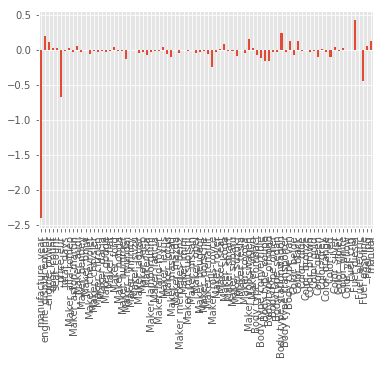

In [12]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

### Reduced the number of explanatory varibles.
The next step is to reduce the number of variables to a managable amount.  We are using 10 because that is enough to capture the data and make the model readable.  We use RFE (Recursive Featrue Elimination) because it works very well with logistic regression. 

In [13]:
from sklearn.feature_selection import RFE

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X[train_indices],y[train_indices])

dfnew = df.loc[:,rfe.support_]

X = dfnew.values # Use the reduced number of variables to predict

X_train = X[train_indices]
y_train = y[train_indices]
    
X_test = X[test_indices]
y_test = y[test_indices]

num_cv_iterations = 10
num_instances = 81500
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix \n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.699693251534
confusion matrix 
 [[ 1379  4451]
 [  444 10026]]
====Iteration 1  ====
accuracy 0.700981595092
confusion matrix 
 [[ 1333  4401]
 [  473 10093]]
====Iteration 2  ====
accuracy 0.697423312883
confusion matrix 
 [[ 1368  4468]
 [  464 10000]]
====Iteration 3  ====
accuracy 0.697668711656
confusion matrix 
 [[1396 4473]
 [ 455 9976]]
====Iteration 4  ====
accuracy 0.70036809816
confusion matrix 
 [[ 1361  4443]
 [  441 10055]]
====Iteration 5  ====
accuracy 0.701349693252
confusion matrix 
 [[ 1316  4382]
 [  486 10116]]
====Iteration 6  ====
accuracy 0.703496932515
confusion matrix 
 [[ 1391  4401]
 [  432 10076]]
====Iteration 7  ====
accuracy 0.700981595092
confusion matrix 
 [[ 1334  4441]
 [  433 10092]]
====Iteration 8  ====
accuracy 0.698466257669
confusion matrix 
 [[ 1306  4470]
 [  445 10079]]
====Iteration 9  ====
accuracy 0.700858895706
confusion matrix 
 [[ 1342  4386]
 [  490 10082]]


We now rescale the new data and print out coefficeints and odds ratios.

In [14]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dfnew.columns) # combine attributes
zip_vars = sorted(zip_vars)

print("\nLogtisical Regression Coefficients of the variables kept")
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out
    
print('\n\nOdds Ratio')
for coef, name in zip_vars:
    oddsr = np.around(np.exp(coef[0]),decimals=2)
    print(name, "has an odds ratio of",oddsr)
    

C:\Users\adamg_000\Anaconda3\envs\ipykernel_py2\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


accuracy: 0.694294478528
[[1382 4529]
 [ 454 9935]]

Logtisical Regression Coefficients of the variables kept
Fuel_gasoline has weight of -0.579627390871
Color_white has weight of -0.450806479405
Color_brown has weight of -0.269527730388
Maker_hyundai has weight of -0.239958266609
Color_beige has weight of -0.165565484161
Maker_rolls-royce has weight of -0.081365557122
Maker_maserati has weight of -0.0603031883607
Maker_lamborghini has weight of -0.0565999249555
Maker_chrysler has weight of 0.064399668558
Maker_alfa-romeo has weight of 0.0960906346418


Odds Ratio
Fuel_gasoline has an odds ratio of 0.56
Color_white has an odds ratio of 0.64
Color_brown has an odds ratio of 0.76
Maker_hyundai has an odds ratio of 0.79
Color_beige has an odds ratio of 0.85
Maker_rolls-royce has an odds ratio of 0.92
Maker_maserati has an odds ratio of 0.94
Maker_lamborghini has an odds ratio of 0.94
Maker_chrysler has an odds ratio of 1.07
Maker_alfa-romeo has an odds ratio of 1.1


### Plot of the new variable list 

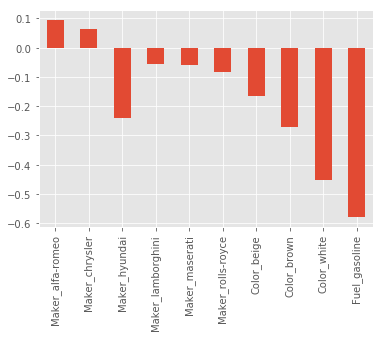

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=dfnew.columns)
weights.plot(kind='bar')
plt.show()

### Visualization Using SVM with the Same Variables.

In [16]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [17]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.698159509202
[[ 1328  4441]
 [  479 10052]]


In [18]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(39536L, 10L)
(39536L,)
[19770 19766]


In [19]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['mileage'] = y[svm_clf.support_] # add back in the 'mileage' Column to the pandas dataframe
df['mileage'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39536 entries, 3068205 to 3187212
Data columns (total 83 columns):
manufacture_year          39536 non-null float64
engine_displacement       39536 non-null float64
engine_power              39536 non-null float64
door_count                39536 non-null int32
seat_count                39536 non-null int32
price_eur                 39536 non-null float64
total_days                39536 non-null int32
Maker_alfa-romeo          39536 non-null uint8
Maker_aston-martin        39536 non-null uint8
Maker_audi                39536 non-null uint8
Maker_bentley             39536 non-null uint8
Maker_bmw                 39536 non-null uint8
Maker_chevrolet           39536 non-null uint8
Maker_chrysler            39536 non-null uint8
Maker_citroen             39536 non-null uint8
Maker_dacia               39536 non-null uint8
Maker_dodge               39536 non-null uint8
Maker_fiat                39536 non-null uint8
Maker_ford                395

C:\Users\adamg_000\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


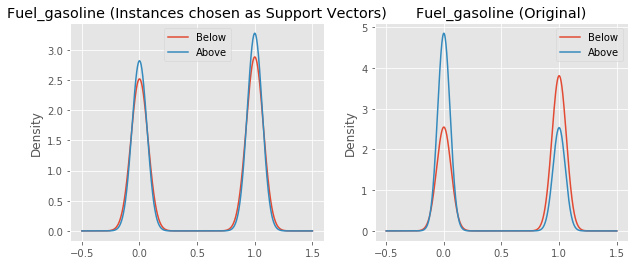

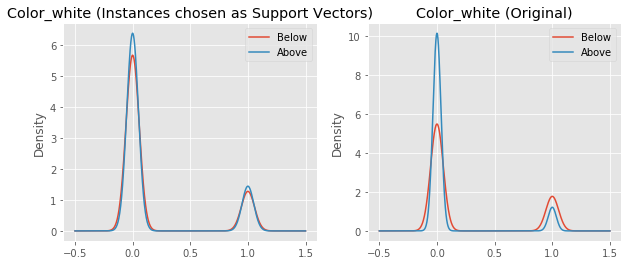

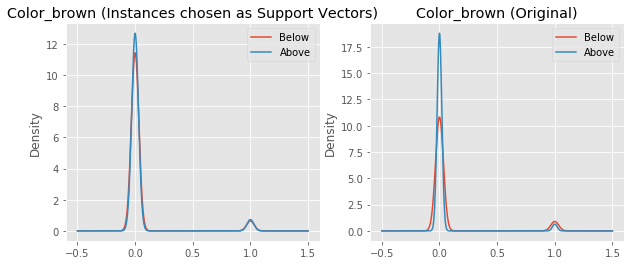

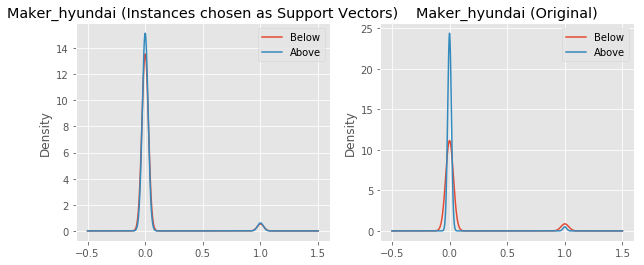

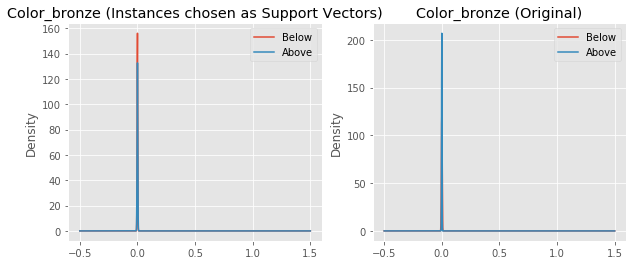

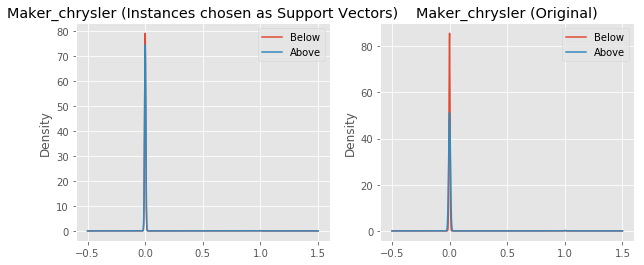

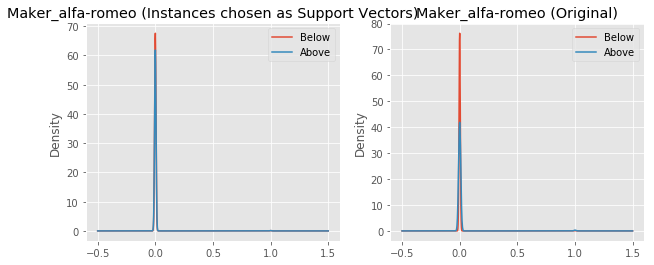

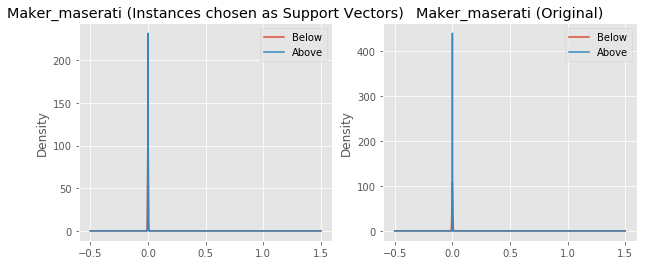

In [20]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['mileage'])
df_grouped = df.groupby(['mileage'])

# plot KDE of Different variables
#I had to remove Maker_rolls-royse and Maker_lamborghini from the model because they were so similar that they caused errors
vars_to_plot = ['Fuel_gasoline','Color_white','Color_brown','Maker_hyundai','Color_bronze','Maker_chrysler','Maker_alfa-romeo','Maker_maserati']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Below','Above'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Below','Above'])
    plt.title(v+' (Original)')

## Interpretation of the results

The model above is built upon the RFE selection process and every time the notebook is run we have different results.  

Some results are universal.  If the Odds ratio is below 1 as that variable increases the chance of that vehicle having over 100K miles decreases.  A perfect example of this is manufacture year, as the year increase the chance of a vehicle having over 100K miles decrease.  This is because new vehicles have not had the time needed to acquire that many miles.  Price in Euros is another examle, as the price increase the chances of a vehicle having over 100K miles decreases.  People are not going to pay alot for a car with alot of miles.

If the Odds ratio is above 1 then as the variable increases the chances of the vehicle having over 100K miles increase.  An example of this is door count and seat count.  As the number of doors and seats increase the odds of the car having over 100K miles increase.  This is because 2 door 2 seaters are more likely to be weekend cars. While the sedans and hatch backs are more likely to family cars drivien daily and on long road trips.

The results based on the binary variables of different models can be either a sign of how exclusive the vehicle is, and therefor it is garaged.  Or, it could be a sign of the reliablity of a manufacture.

## Model Advantages

The initial logistic regression model we tested which included all the variables resulted in a prediction accuracy of 87%, or in other words our model was able to predict 87% of cases correctly. You would expect that number to be relatively high given the number of feature variables we entered into the model. As a general rule of thumb we know that more features results in an increase in accuracy. However, that resulted in a model that was overfitted and the number of features made it difficult to interpret. Therefore, we used RFE selection process to reduce the number of features in our model. 

The resulting model actually reduced the prediction accuracy from 87% to 69%. However, the model was not overfitted and was more interpretable. In addition, the model had a faster training time compared to our original logistic regression model. Therefore, we deemed this model to be the more valid and the better model of the two.

When comparing the results from the SVM model to the logistic regression, the prediction accuracy is 70% compared to 69%. Although the SVM model is only slightly more accurate, it is more robust to the influence of outliers which improves its predictive ability (preliminary tests found outliers in our data). In addition, SVM models are better able to cope with nonlinearity by using nonlinear kernal functions. A disadvantage to the SVM model however is the training time, it took significantly longer compared to the logistic regression.    

